In [33]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
%matplotlib inline
from sklearn. model_selection import train_test_split

Importing the data

In [34]:
dataframe = pd.read_csv('dataset.csv')


In [35]:
dataframe.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [36]:
dataframe.shape

(7253, 13)

In [37]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


In [38]:
dataframe.describe()

,Year,Kilometers_Driven,Seats,Price
count,7253.000000,7.253000e+03,7200.000000,6019.000000
mean,2013.365366,5.869906e+04,5.279722,9.479468
std,3.254421,8.442772e+04,0.811660,11.187917
min,1996.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.341600e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [39]:
dataframe.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

For a dataset with 7000 values a column 6000+ null values will have to be dropped

In [40]:
dataframe = dataframe.drop(["New_Price"],axis=1)

In [41]:
dataframe =dataframe.drop(["Name"],axis=1)

In [98]:
dataframe["Location"].unique()

KeyError: 'Location'

We will now extract the numeric value from the columns Engine,Power and Mileage

In [43]:
Mileagee = dataframe["Mileage"].str.split(" ", expand = True)
dataframe["Mileage"] = pd.to_numeric(Mileagee[0], errors = 'coerce')


In [44]:
dataframe.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998 CC,58.16 bhp,5.0,1.75
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582 CC,126.2 bhp,5.0,12.50
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199 CC,88.7 bhp,5.0,4.50
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248 CC,88.76 bhp,7.0,6.00
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968 CC,140.8 bhp,5.0,17.74


Now for engine and power we just have to drop the CC and bhp

In [45]:
Enginecc = dataframe["Engine"].str.split(" ", expand = True)
dataframe["Engine"] = pd.to_numeric(Enginecc[0], errors = 'coerce')

In [46]:
Pbhp = dataframe["Power"].str.split(" ", expand = True)
dataframe["Power"] = pd.to_numeric(Pbhp[0], errors = 'coerce')

In [47]:
dataframe.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


Much better,now that we have the numeric values in proper format,let's work on the categorical values

In [48]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           7253 non-null   object 
 1   Year               7253 non-null   int64  
 2   Kilometers_Driven  7253 non-null   int64  
 3   Fuel_Type          7253 non-null   object 
 4   Transmission       7253 non-null   object 
 5   Owner_Type         7253 non-null   object 
 6   Mileage            7251 non-null   float64
 7   Engine             7207 non-null   float64
 8   Power              7078 non-null   float64
 9   Seats              7200 non-null   float64
 10  Price              6019 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 623.4+ KB


<AxesSubplot:>

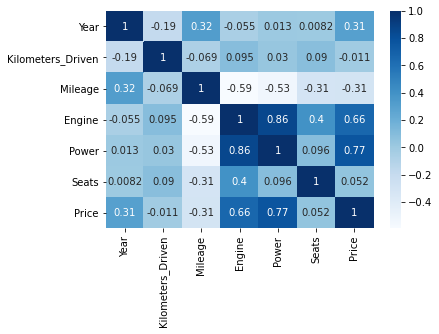

In [49]:
sns.heatmap(dataframe.corr(),cmap="Blues",annot=True)

From the correlation graph we can that the price of the car depends greatly on the Power and Engine and not so much over the Mileage and kilometers driven

In [50]:
dataframe=dataframe.drop(['Location'],axis=1)

C:\Users\nicole\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fuel_Type', ylabel='count'>

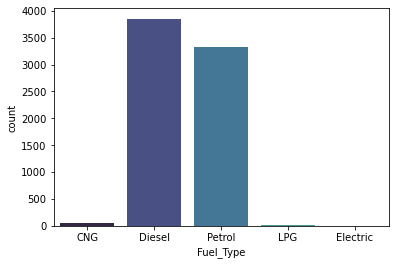

In [51]:
sns.countplot(dataframe['Fuel_Type'],palette='mako')

C:\Users\nicole\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Transmission', ylabel='count'>

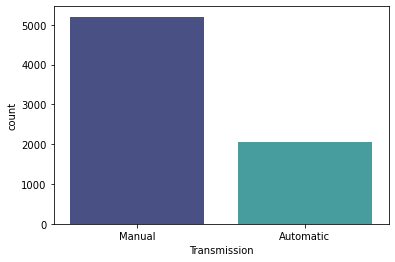

In [52]:
sns.countplot(dataframe['Transmission'],palette='mako')

C:\Users\nicole\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Owner_Type', ylabel='count'>

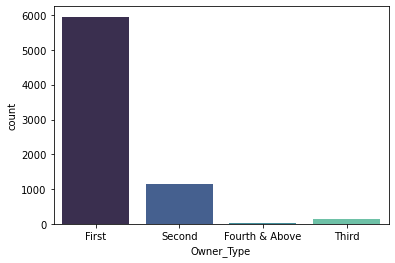

In [53]:
sns.countplot(dataframe['Owner_Type'],palette='mako')

In [54]:
dataf =pd.get_dummies(dataframe, columns=['Fuel_Type','Transmission','Owner_Type'])

In [55]:
dataf.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,26.60,998.0,58.16,5.0,1.75,1,0,0,0,0,0,1,1,0,0,0
1,2015,41000,19.67,1582.0,126.20,5.0,12.50,0,1,0,0,0,0,1,1,0,0,0
2,2011,46000,18.20,1199.0,88.70,5.0,4.50,0,0,0,0,1,0,1,1,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,6.00,0,1,0,0,0,0,1,1,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,17.74,0,1,0,0,0,1,0,0,0,1,0


In [64]:
dataf.isna().sum()

Year                            0
Kilometers_Driven               0
Mileage                         2
Engine                         46
Power                         175
Seats                          53
Price                        1234
Fuel_Type_CNG                   0
Fuel_Type_Diesel                0
Fuel_Type_Electric              0
Fuel_Type_LPG                   0
Fuel_Type_Petrol                0
Transmission_Automatic          0
Transmission_Manual             0
Owner_Type_First                0
Owner_Type_Fourth & Above       0
Owner_Type_Second               0
Owner_Type_Third                0
dtype: int64

Now let's impute the missing values by calculating mean

In [65]:
dataf["Mileage"].fillna(dataf["Mileage"].astype("float64").mean(), inplace = True)
dataf["Engine"].fillna(dataf["Engine"].astype("float64").mean(), inplace = True)
dataf["Power"].fillna(dataf["Power"].astype("float64").mean(), inplace = True)
dataf["Seats"].fillna(dataf["Seats"].astype("float64").mean(), inplace = True)
dataf["Price"].fillna(dataf["Price"].astype("float64").mean(), inplace = True)

In [66]:
dataf.isna().sum()

Year                         0
Kilometers_Driven            0
Mileage                      0
Engine                       0
Power                        0
Seats                        0
Price                        0
Fuel_Type_CNG                0
Fuel_Type_Diesel             0
Fuel_Type_Electric           0
Fuel_Type_LPG                0
Fuel_Type_Petrol             0
Transmission_Automatic       0
Transmission_Manual          0
Owner_Type_First             0
Owner_Type_Fourth & Above    0
Owner_Type_Second            0
Owner_Type_Third             0
dtype: int64

In [68]:
df.columns

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_Electric',
       'Fuel_Type_LPG', 'Fuel_Type_Petrol', 'Transmission_Automatic',
       'Transmission_Manual', 'Owner_Type_First', 'Owner_Type_Fourth & Above',
       'Owner_Type_Second', 'Owner_Type_Third'],
      dtype='object')

In [69]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['Price']), df[['Price']])
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5439, 17)
(1814, 17)
(5439, 1)
(1814, 1)


In [73]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso,ElasticNet
from sklearn.feature_selection import SelectKBest, f_regression

C:\Users\nicole\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\nicole\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\nicole\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\nicole\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\nicole\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed wh

<AxesSubplot:>

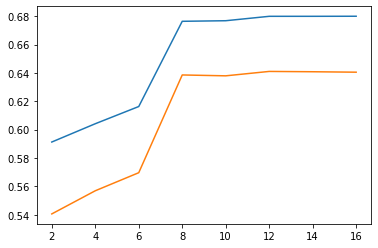

In [75]:
column_names = df.drop(columns = ['Price']).columns

no_of_features = []
r_squared_train = []
r_squared_test = []

for k in range(2, 17, 2):
    selector = SelectKBest(f_regression, k = k)
    X_train_transformed = selector.fit_transform(X_train, y_train)
    X_test_transformed = selector.transform(X_test)
    regressor = LinearRegression()
    regressor.fit(X_train_transformed, y_train)
    no_of_features.append(k)
    r_squared_train.append(regressor.score(X_train_transformed, y_train))
    r_squared_test.append(regressor.score(X_test_transformed, y_test))
    
sns.lineplot(x = no_of_features, y = r_squared_train, legend = 'full')
sns.lineplot(x = no_of_features, y = r_squared_test, legend = 'full')

In [76]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso,ElasticNet

To see if feature scaling improves the accuracy of our model or not we will try running the algorithms without a feature scaler once and once with StandardScaler and once with MinMax

In [77]:
from sklearn.preprocessing import MinMaxScaler

X_mtrain= MinMaxScaler().fit_transform(X_train)
X_mtest= MinMaxScaler().fit_transform(X_test)


In [78]:
from sklearn.preprocessing import StandardScaler

X_strain = StandardScaler().fit_transform(X_train)
X_stest = StandardScaler().fit_transform(X_test)

Linear Regression without Feature Scaling

In [82]:

from sklearn.metrics import r2_score


In [83]:
linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)
y_pred = linearRegression.predict(X_test)
r2_score(y_test, y_pred)*100

64.05013261043455

Linear Regression with MinMax Scaler

In [84]:
linearRegression = LinearRegression()
linearRegression.fit(X_mtrain, y_train)
y_pred = linearRegression.predict(X_mtest)
r2_score(y_test, y_pred)*100

49.282086099463406

Linear Regression with Standard Scaler

In [85]:
linearRegression = LinearRegression()
linearRegression.fit(X_strain, y_train)
y_pred = linearRegression.predict(X_stest)
r2_score(y_test, y_pred)*100

-2.4100859758955704e+22

Lasso Regression without Feature Scaling

In [86]:

lass=Lasso(alpha=0.1).fit(X_train,y_train)
y_pred = lass.predict(X_test)
r2_score(y_test, y_pred)*100

63.71137019416167

Lasso Regression with MinMax Scaler

In [87]:
lass=Lasso(alpha=0.1).fit(X_mtrain,y_train)
y_pred = lass.predict(X_mtest)
r2_score(y_test, y_pred)*100

59.66857250182625

Lasso Regression with Standard Scaler

In [88]:
lass=Lasso(alpha=0.1).fit(X_strain,y_train)
y_pred = lass.predict(X_stest)
r2_score(y_test, y_pred)*100

63.85693602097149

Ridge Regression without Feature Scaling

In [89]:
rid =Ridge(alpha=1.0).fit(X_train,y_train)
y_pred = rid.predict(X_test)
r2_score(y_test, y_pred)*100

64.04944503443359

Ridge Regression with MinMax Scaler

In [90]:
rid =Ridge(alpha=1.0).fit(X_mtrain,y_train)
y_pred = rid.predict(X_mtest)
r2_score(y_test, y_pred)*100

49.3380950370375

Ridge Regression with Standard Scaler

In [91]:
rid =Ridge(alpha=1.0).fit(X_strain,y_train)
y_pred = rid.predict(X_stest)
r2_score(y_test, y_pred)*100

63.94991928517415

Random Forest Regressor without Feature Scaling

In [92]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=150)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
r2_score(y_test, y_pred)*100

<ipython-input-92-6f9716cea990>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


79.31617999771603

Random Forest Regressor with MinMax Scaler

In [93]:
rf.fit(X_mtrain, y_train)
y_pred = rf.predict(X_mtest)
r2_score(y_test, y_pred)*100

<ipython-input-93-9cd3db88a8e5>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_mtrain, y_train)


64.96344956351312

Random Forest Regressor with Standard Scaler

In [94]:
rf.fit(X_strain, y_train)
y_pred = rf.predict(X_stest)
r2_score(y_test, y_pred)*100

<ipython-input-94-9bf49bf5ff65>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_strain, y_train)


74.00696291271733

MLP regressor without Feature Scaling

In [95]:
from sklearn.neural_network import MLPRegressor
mlp =MLPRegressor()
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
r2_score(y_test, y_pred)*100

C:\Users\nicole\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


-1309.8783319605734

MLP regressor with MinMax Scaling

In [96]:
mlp.fit(X_mtrain, y_train)
y_pred = mlp.predict(X_mtest)
r2_score(y_test, y_pred)*100

C:\Users\nicole\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\nicole\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


52.745220517847834

MLP regressor with Standard Scaling

In [97]:
mlp.fit(X_strain, y_train)
y_pred = mlp.predict(X_stest)
r2_score(y_test, y_pred)*100

C:\Users\nicole\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\nicole\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


77.76677999651423